In [2]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, History
import keras.layers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [ ]:
pip install keras

In [ ]:
!pip install concise

In [ ]:
pip install tensorflow-gpu==1.15.0

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 170 µs (started: 2021-11-05 05:53:13 +00:00)


In [ ]:
def onehot_encode(sequences):
    onehot = []
    mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    for sequence in sequences:
        arr = np.zeros((len(sequence), 4)).astype("float")
        for (i, letter) in enumerate(sequence):
            arr[i, mapping[letter]] = 1.0
        onehot.append(arr)
    return onehot

def evaluate(model, x, y):

    keras_metrics = {name: metric 
                     for name, metric in zip(model.metrics_names, 
                                             model.evaluate(x, y, verbose=0))}
    y_pred = model.predict(x)
    
    return {**keras_metrics}

from concise.utils.pwm import DEFAULT_BASE_BACKGROUND, pssm_array2pwm_array, _pwm2pwm_info
from concise.utils.plot import seqlogo, seqlogo_fig

def plot_filters(W, ncol=2, figsize=(10,10)):
    N = W.shape[2]
    nrow = int(np.ceil(N/ncol))
    fig, ax = plt.subplots(nrow, ncol, figsize=figsize)
    for i in range(N):
        ax = fig.axes[i]
        seqlogo(W[:,:,i], ax=ax);
        ax.set_title(f"Filter: {i}")
    plt.tight_layout()

2021-11-05 05:53:13,776 [INFO] Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
2021-11-05 05:53:13,823 [INFO] Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt


2021-11-05 05:53:14,212 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



time: 787 ms (started: 2021-11-05 05:53:13 +00:00)


**Prueba de 5000**

In [ ]:
dataset5000 = pd.read_csv('dataset5000CNN.txt', sep=",")

time: 107 ms (started: 2021-11-05 05:53:14 +00:00)


In [ ]:
x = dataset5000['sequence'].astype(str).tolist()
y = dataset5000['Bound']

time: 18.3 ms (started: 2021-11-05 05:53:14 +00:00)


In [ ]:
x_one_hot = onehot_encode(x)

time: 2.44 s (started: 2021-11-05 05:53:14 +00:00)


In [ ]:
x_final = np.array(list(x for x in x_one_hot))

time: 117 ms (started: 2021-11-05 05:53:16 +00:00)


In [ ]:
x_final.shape

(10000, 1000, 4)

time: 5.33 ms (started: 2021-11-05 05:53:16 +00:00)


In [ ]:
y.shape

(10000,)

time: 7.46 ms (started: 2021-11-05 05:53:16 +00:00)


In [ ]:
modelCNN5000 = Sequential([Conv1D(filters=5, kernel_size=15, activation='relu', input_shape=x_final.shape[1:], kernel_initializer="glorot_uniform"),
                    GlobalMaxPooling1D(),
                    Dense(units=1),
                    Activation('sigmoid')
                   ])

2021-11-05 05:53:17,011 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



2021-11-05 05:53:17,016 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



2021-11-05 05:53:17,047 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



time: 84.3 ms (started: 2021-11-05 05:53:17 +00:00)


In [ ]:
modelCNN5000.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2021-11-05 05:53:17,128 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2021-11-05 05:53:17,139 [WARNING] From /usr/local/lib/python3.7/dist-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


time: 67.6 ms (started: 2021-11-05 05:53:17 +00:00)


In [ ]:
history = modelCNN5000.fit(x_final, y,batch_size=128,epochs=100)

2021-11-05 05:53:17,375 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



2021-11-05 05:53:17,474 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



2021-11-05 05:53:17,532 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



Epoch 1/100



2021-11-05 05:53:17,546 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



2021-11-05 05:53:17,550 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



2021-11-05 05:53:18,893 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



2021-11-05 05:53:18,902 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.



2021-11-05 05:53:18,972 [WARNING] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



10000/10000 [==============================] - 7s 728us/step - loss: 0.7436 - acc: 0.4942
Epoch 2/100
10000/10000 [==============================] - 1s 69us/step - loss: 0.6808 - acc: 0.5828
Epoch 3/100
10000/10000 [==============================] - 1s 70us/step - loss: 0.6594 - acc: 0.6812
Epoch 4/100
10000/10000 [==============================] - 1s 72us/step - loss: 0.6355 - acc: 0.7443
Epoch 5/100
10000/10000 [==============================] - 1s 72us/step - loss: 0.6122 - acc: 0.7732
Epoch 6/100
10000/10000 [==============================] - 1s 68us/step - loss: 0.5890 - acc: 0.7938
Epoch 7/100
10000/10000 [==============================] - 1s 73us/step - loss: 0.5645 - acc: 0.8055
Epoch 8/100
10000/10000 [==============================] - 1s 72us/step - loss: 0.5405 - acc: 0.8110
Epoch 9/100
10000/10000 [==============================] - 1s 68us/step - loss: 0.5177 - acc: 0.8204
Epoch 10/100
10000/10000 [==============================] - 1s 74us/step - loss: 0.4963 - acc: 0.8261


In [ ]:
W_conv, b_conv = modelCNN5000.layers[0].get_weights()

time: 19.7 ms (started: 2021-11-05 05:54:35 +00:00)


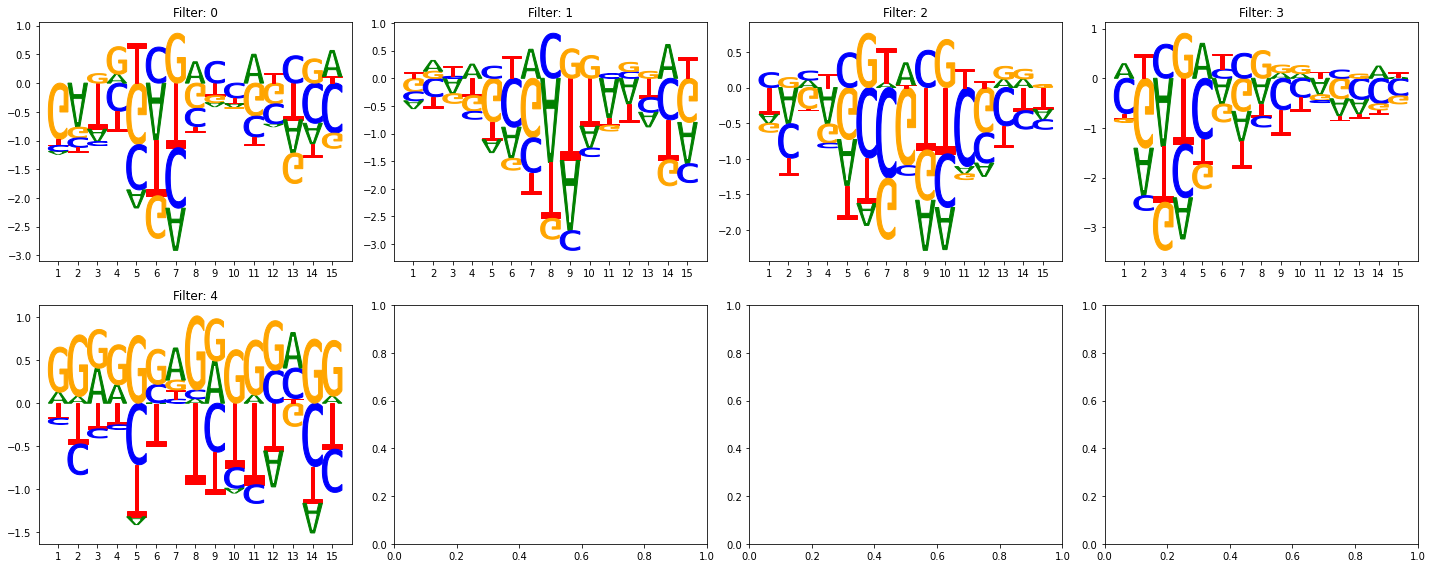

time: 2.9 s (started: 2021-11-05 05:54:35 +00:00)


In [ ]:
plot_filters(W_conv, 4, figsize=(20,8))

In [ ]:
modelCNN5000 = Sequential([Conv1D(filters=10, kernel_size=15, activation='relu', input_shape=x_final.shape[1:], kernel_initializer="glorot_uniform"),
                    GlobalMaxPooling1D(),
                    Dense(units=1),
                    Activation('sigmoid')
                   ])

time: 59.8 ms (started: 2021-11-05 05:54:38 +00:00)


In [ ]:
modelCNN5000.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

time: 50.2 ms (started: 2021-11-05 05:54:38 +00:00)


In [ ]:
history = modelCNN5000.fit(x_final, y,batch_size=128,epochs=100)

Epoch 1/100
10000/10000 [==============================] - 1s 104us/step - loss: 0.6826 - acc: 0.5852
Epoch 2/100
10000/10000 [==============================] - 1s 78us/step - loss: 0.6532 - acc: 0.7285
Epoch 3/100
10000/10000 [==============================] - 1s 74us/step - loss: 0.6047 - acc: 0.8589
Epoch 4/100
10000/10000 [==============================] - 1s 77us/step - loss: 0.5240 - acc: 0.9140
Epoch 5/100
10000/10000 [==============================] - 1s 74us/step - loss: 0.4368 - acc: 0.9399
Epoch 6/100
10000/10000 [==============================] - 1s 73us/step - loss: 0.3581 - acc: 0.9578
Epoch 7/100
10000/10000 [==============================] - 1s 76us/step - loss: 0.2969 - acc: 0.9649
Epoch 8/100
10000/10000 [==============================] - 1s 76us/step - loss: 0.2491 - acc: 0.9720
Epoch 9/100
10000/10000 [==============================] - 1s 74us/step - loss: 0.2128 - acc: 0.9748
Epoch 10/100
10000/10000 [==============================] - 1s 72us/step - loss: 0.1839 - 

In [ ]:
W_conv, b_conv = modelCNN5000.layers[0].get_weights()

time: 27.1 ms (started: 2021-11-05 05:55:54 +00:00)


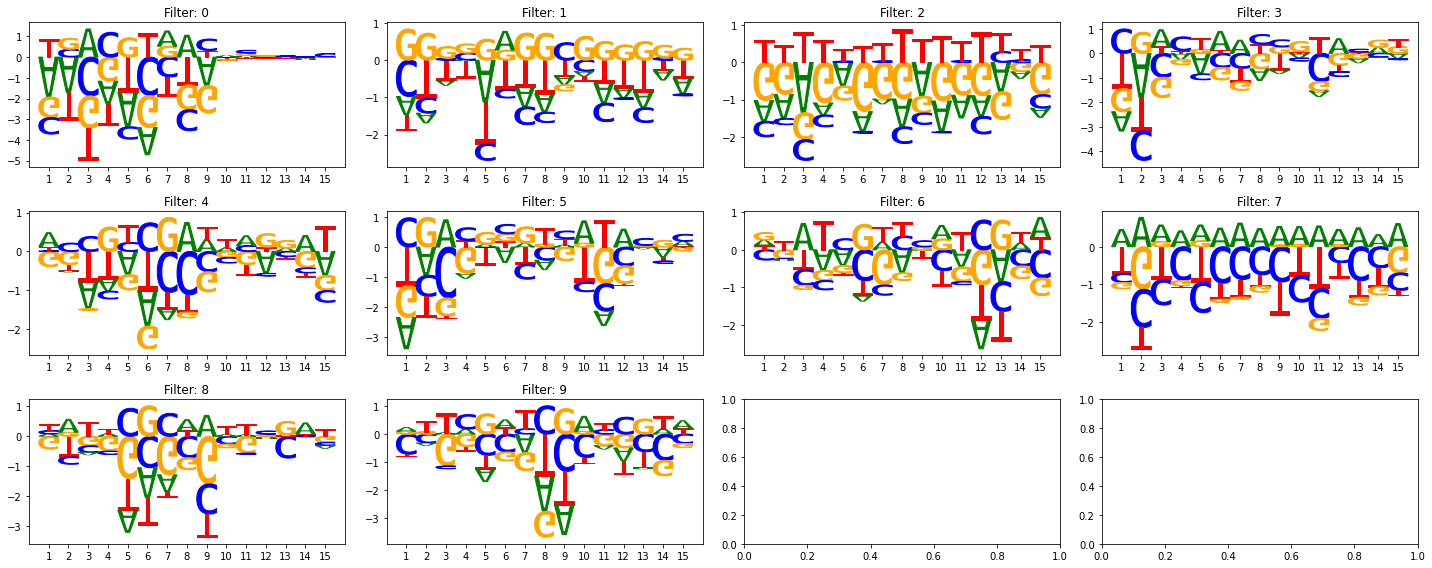

time: 4.36 s (started: 2021-11-05 05:55:54 +00:00)


In [ ]:
plot_filters(W_conv, 4, figsize=(20,8))

In [ ]:
modelCNN5000 = Sequential([Conv1D(filters=16, kernel_size=15, activation='relu', input_shape=x_final.shape[1:], kernel_initializer="glorot_uniform"),
                    GlobalMaxPooling1D(),
                    Dense(units=1),
                    Activation('sigmoid')
                   ])

time: 59.1 ms (started: 2021-11-05 05:55:58 +00:00)


In [ ]:
modelCNN5000.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

time: 48.8 ms (started: 2021-11-05 05:55:58 +00:00)


In [ ]:
history = modelCNN5000.fit(x_final, y,batch_size=128,epochs=100)

Epoch 1/100
10000/10000 [==============================] - 1s 118us/step - loss: 0.6766 - acc: 0.6325
Epoch 2/100
10000/10000 [==============================] - 1s 84us/step - loss: 0.5856 - acc: 0.9085
Epoch 3/100
10000/10000 [==============================] - 1s 81us/step - loss: 0.4613 - acc: 0.9689
Epoch 4/100
10000/10000 [==============================] - 1s 83us/step - loss: 0.3518 - acc: 0.9721
Epoch 5/100
10000/10000 [==============================] - 1s 82us/step - loss: 0.2653 - acc: 0.9733
Epoch 6/100
10000/10000 [==============================] - 1s 79us/step - loss: 0.1892 - acc: 0.9784
Epoch 7/100
10000/10000 [==============================] - 1s 81us/step - loss: 0.1318 - acc: 0.9851
Epoch 8/100
10000/10000 [==============================] - 1s 81us/step - loss: 0.0940 - acc: 0.9897
Epoch 9/100
10000/10000 [==============================] - 1s 81us/step - loss: 0.0696 - acc: 0.9930
Epoch 10/100
10000/10000 [==============================] - 1s 80us/step - loss: 0.0534 - 

In [ ]:
W_conv, b_conv = modelCNN5000.layers[0].get_weights()

time: 25.3 ms (started: 2021-11-05 05:57:19 +00:00)


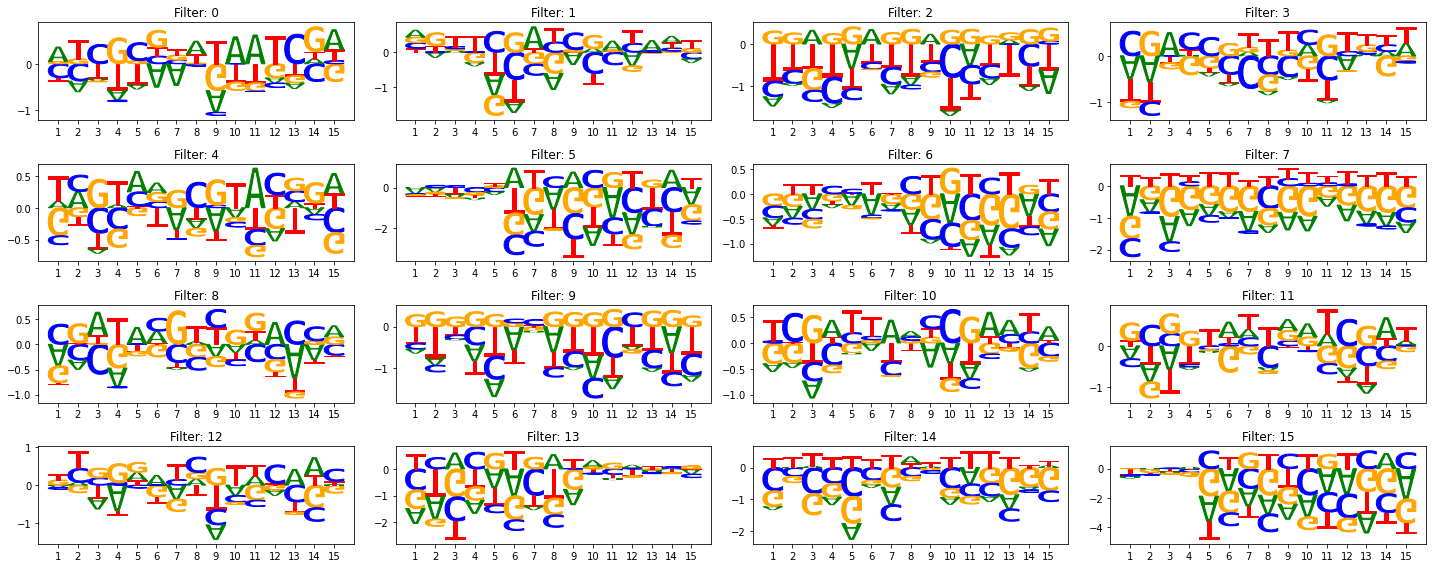

time: 5.87 s (started: 2021-11-05 05:57:19 +00:00)


In [ ]:
plot_filters(W_conv, 4, figsize=(20,8))

In [3]:
resultados = pd.read_csv('results.csv', sep=";")

In [4]:
resultados

,Número de secuencias,Método,Tiempo de ejecución (segundos)
0,500,CNN(5),9.9
1,1000,CNN(5),17.4
2,2000,CNN(5),31.9
3,5000,CNN(5),78.0
4,10000,CNN(5),148.0
5,20000,CNN(5),296.0
6,500,CNN(10),10.0
7,1000,CNN(10),17.7
8,2000,CNN(10),33.3
9,5000,CNN(10),75.0


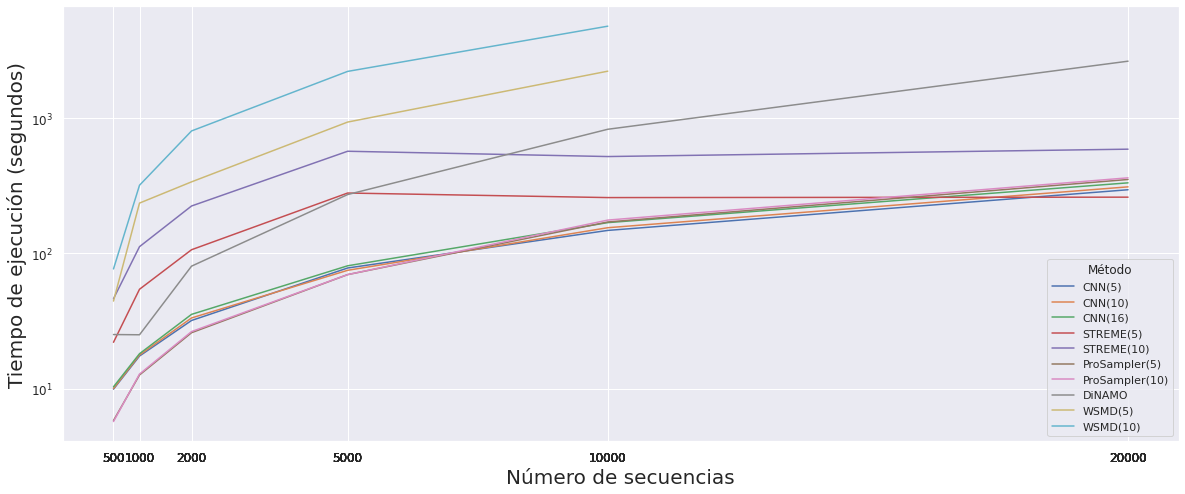

In [29]:
sns.set(rc = {'figure.figsize':(20,8)})
graph = sns.lineplot(data=resultados, x="Número de secuencias", y="Tiempo de ejecución (segundos)", hue="Método")
graph.set_yscale('log')
graph.set_xticks(resultados["Número de secuencias"])
graph.set_xlabel("Número de secuencias",fontsize=20)
graph.set_ylabel("Tiempo de ejecución (segundos)",fontsize=20)
graph.tick_params(labelsize=12)

In [8]:
detalle = pd.read_csv('resultsDetail.txt', sep=";")

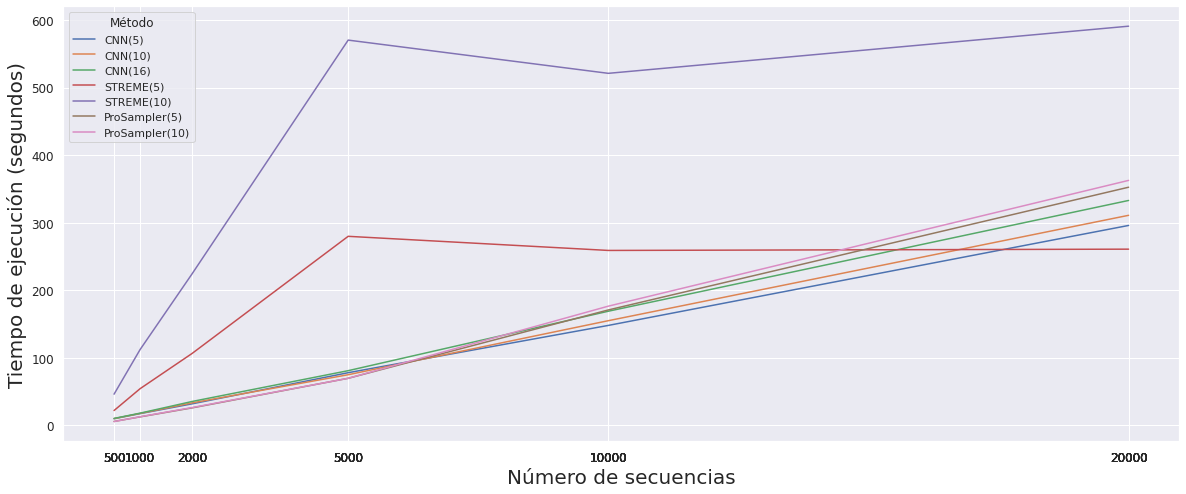

In [16]:
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(20,8)})
graph = sns.lineplot(data=detalle, x="Número de secuencias", y="Tiempo de ejecución (segundos)", hue="Método")
graph.set_xticks(detalle["Número de secuencias"])
graph.set_xlabel("Número de secuencias",fontsize=20)
graph.set_ylabel("Tiempo de ejecución (segundos)",fontsize=20)
graph.tick_params(labelsize=12)